<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobVegaTec/blob/main/Actividad7_ejercicios_1_y_2_TecMty_Regresion_lineal_polinomial_A013789021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

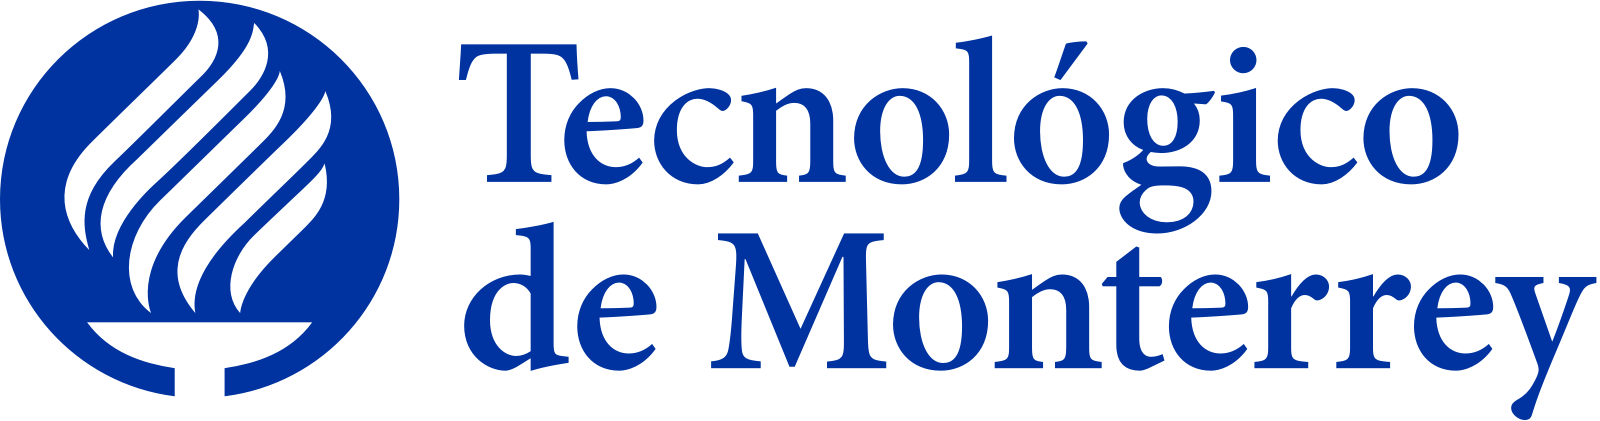

Materia: Ciencia y analítica de datos

Nombre de la actividad: Semana 8: Regresión lineal y Polinomial

Nombre del alumno: Roberto Vega Alanis

Matrícula: A01378921

Fecha: 045 de Noviembre de 2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)
#test

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

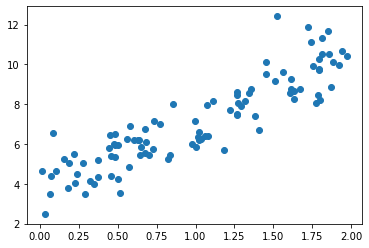

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

0
0    3.508550
1    8.050716
2    6.179208
3    6.337073
4   11.311173
..        ...
95   5.441928
96  10.121188
97   9.787643
98   8.061635
99   9.597115

[100 rows x 1 columns]

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

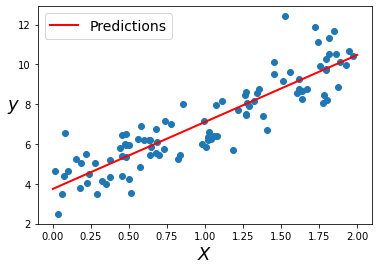

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

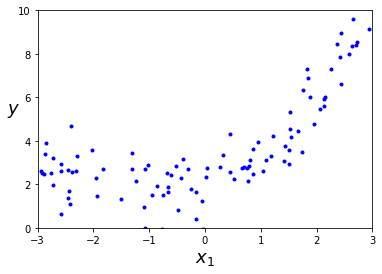

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

0
0   8.529240
1   3.768929
2   3.354423
3   2.747935
4   0.808458
..       ...
95  5.346771
96  6.338229
97  3.488785
98  1.372002
99 -0.072150

[100 rows x 1 columns]

Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

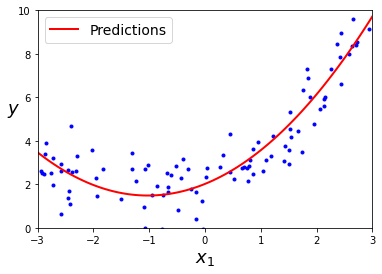

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

Number of Units  Manufacturing Cost
968         7.065653           27.804027
212         3.372115           41.127212
416         4.194513           43.832711
677         5.068888           41.225741
550         4.604122           37.569764
764         5.389522           31.191501
386         4.104190           42.988730
339         3.942214           46.291435
82          2.665856           48.578425
487         4.399514           37.567914

In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

## División de los datos

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

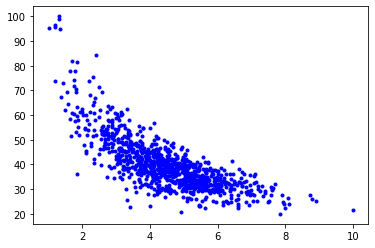

In [ ]:
plt.plot(X,y,'b.')

## Regresión lineal

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### Modelo

In [ ]:
#lineal
lr = LinearRegression(fit_intercept=True)

# Entrenamos el modelo
lr.fit(X_train,y_train)

# Elementos de su ecuación
print('Pendiente: ',lr.coef_)
print('Ordenada al origen: ',lr.intercept_)

Pendiente:  [-5.98882699]
Ordenada al origen:  66.83650741226988


### Ecuación

In [ ]:
# Impresión de ecuación
print('\hat{y} = ',end = ' ')
print(np.around(lr.intercept_,5),end = ' ')

for i, x in enumerate(lr.coef_):
  if i == 0:
    if x >= 0:
      print(' + ' + str(np.around(x,5)) + 'X',end = ' ')
    else:
      print(str(np.around(x,5)) + 'X',end = ' ')
  else:
    if x >= 0:
      print(' + ' + str(np.around(x,5)) + 'X^' + str(i),end = ' ')
    else:
      print(str(np.around(x,5)) + 'X^' + str(i),end = ' ')

\hat{y} =  66.83651 -5.98883X 

Ecuación resultante:

$\hat{y} =  -5.99X + 66.84$

### Visualización

c:\Users\PC\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


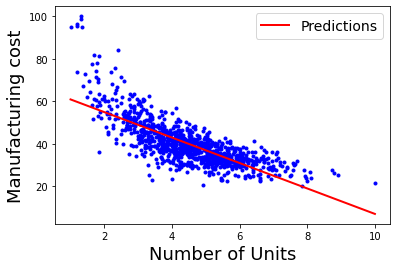

In [ ]:
# Creamos puntos para la gráfica a partir de función creada
X_base = np.linspace(X.min(),X.max(),100).reshape(100,1) # valores en x igualmente espaciados
y_pred = lr.predict(X_base) # resultado en y (eje horizontal) a partir de datso de entrada con función creada

# Imprimimos los puntos originales
plt.plot(X,y,'b.')

# Imprimimos la función resultante como una línea
plt.plot(X_base, y_pred, "r-", linewidth=2, label="Predictions")
# Imprimimos etiqueta de eje x
plt.xlabel("Number of Units", fontsize=18)
# Imprimimos etiqueta de eje y
plt.ylabel("Manufacturing cost", rotation=90, fontsize=18)
# Agregamos leyenda de línea para identificarla con un nombre
plt.legend(loc="upper right", fontsize=14)

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de prueba
y_pred_lr_train = lr.predict(X_train)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
lr_mae_train = metrics.mean_absolute_error(y_train, y_pred_lr_train)
lr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr_train))
lr_r2_train = r2_score(y_train, y_pred_lr_train)

print('Error en datos de entrenamiento:')
print('Error Medio Absoluto (MAE):', lr_mae_train)
print('Error Cuadrático Medio (RMSE):', lr_rmse_train)
print('r2_score:',lr_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_lr_test = lr.predict(X_test)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
lr_mae_test = metrics.mean_absolute_error(y_test, y_pred_lr_test)
lr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_test))
lr_r2_test = r2_score(y_test, y_pred_lr_test)

print('Error en datos de prueba:')
print('Error Medio Absoluto (MAE):', lr_mae_test)
print('Error Cuadrático Medio (RMSE):', lr_rmse_test)
print('r2_score:',lr_r2_test)

Error en datos de entrenamiento:
Error Medio Absoluto (MAE): 4.905332101451236
Error Cuadrático Medio (RMSE): 6.844866083710475
r2_score: 0.5746524649404298

---------------------------

Error en datos de prueba:
Error Medio Absoluto (MAE): 5.013587781954963
Error Cuadrático Medio (RMSE): 7.108963321847682
r2_score: 0.6116251549562579


## Regresión polinomial

Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### Modelo

In [ ]:
#polinomial

# Creación de objeto modelo
lrp = LinearRegression(fit_intercept = True)

# Transformación de preprocesamiento polinomial (tanto a valores de entrenamiento como de prueba)
pr = PolynomialFeatures(degree = 2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

# Entrenamiento del modelo
lrp.fit(X_train_pr,y_train)


# Elementos de su ecuación
print('Coeficientes: ',lrp.coef_)
print('Ordenada al origen: ',lrp.intercept_)


Coeficientes:  [  0.         -16.40638102   1.13136095]
Ordenada al origen:  88.80179909112495


### Ecuación

In [ ]:
# Impresión de ecuación
print('\hat{y} = ',end = ' ')

for i, x in enumerate(lrp.coef_):
  if i == 0:
    print(round(lrp.intercept_,5),end = ' ')
  elif i == 1:
    if x >= 0:
      print(' + ' + str(round(x,5)) + 'X',end = ' ')
    else:
      print(str(round(x,5)) + 'X',end = ' ')
  else:
    if x >= 0:
      print(' + ' + str(round(x,5)) + 'X^' + str(i),end = ' ')
    else:
      print(str(round(x,5)) + 'X^' + str(i),end = ' ')

\hat{y} =  88.8018 -16.40638X  + 1.13136X^2 

Ecuación resultante:

$\hat{y} =  1.13X^2 -16.41X + 88.80$

### Visualización

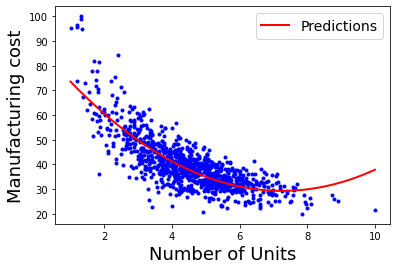

In [ ]:
# Creamos puntos para la gráfica a partir de función creada
X_base = np.linspace(X.min(),X.max(),100).reshape(100,1) # valores en x igualmente espaciados
X_base_pr = pr.fit_transform(X_base) # aplica transformación polinomial de los valores predictores
y_pred = lrp.predict(X_base_pr) # resultado en y (eje horizontal) a partir de datso de entrada con función creada

# Imprimimos los puntos originales
plt.plot(X,y,'b.')

# Imprimimos la función resultante como una línea
plt.plot(X_base, y_pred, "r-", linewidth=2, label="Predictions")
# Imprimimos etiqueta de eje x
plt.xlabel("Number of Units", fontsize=18)
# Imprimimos etiqueta de eje y
plt.ylabel("Manufacturing cost", rotation=90, fontsize=18)
# Agregamos leyenda de línea para identificarla con un nombre
plt.legend(loc="upper right", fontsize=14)

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de prueba
y_pred_pr_train = lrp.predict(X_train_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
pr_mae_train = metrics.mean_absolute_error(y_train, y_pred_pr_train)
pr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_pr_train))
pr_r2_train = r2_score(y_train, y_pred_pr_train)

print('Error en datos de entrenamiento:')
print('Error medio Absoluto (MAE):',pr_mae_train)
print('Error Cuadrático Medio (RMSE):', pr_rmse_train)
print('r2_score',pr_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_pr_test = lrp.predict(X_test_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
pr_mae_test = metrics.mean_absolute_error(y_test, y_pred_pr_test)
pr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_pr_test))
pr_r2_test = r2_score(y_test, y_pred_pr_test)

print('Error en datos de prueba:')
print('Error medio Absoluto (MAE):',pr_mae_test)
print('Error Cuadrático Medio (RMSE):', pr_rmse_test)
print('r2_score',pr_r2_test)

Error en datos de entrenamiento:
Error medio Absoluto (MAE): 4.545086474348086
Error Cuadrático Medio (RMSE): 6.162532575212149
r2_score 0.6552276217097528

---------------------------

Error en datos de prueba:
Error medio Absoluto (MAE): 4.383302575968108
Error Cuadrático Medio (RMSE): 5.832771301068425
r2_score 0.7385501224942536


## Ridge

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Modelo

In [ ]:
# Ridge
from sklearn.linear_model import Ridge

# Creación de objeto modelo
lr_ridge = Ridge(fit_intercept = True, alpha = 0.01)

# Transformación de preprocesamiento polinomial (tanto a valores de entrenamiento como de prueba)
pr = PolynomialFeatures(degree = 10) # usamos un modelo con un grado elevado para que la regularización tenga un efecto útil
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

# Entrenamiento del modelo
lr_ridge.fit(X_train_pr,y_train)


# Elementos de su ecuación
print('Coeficientes: ',lr_ridge.coef_)
print('Ordenada al origen: ',lr_ridge.intercept_)

Coeficientes:  [ 0.00000000e+00 -9.58228535e+01 -2.82531794e+01  5.93402431e+01
 -3.16315013e+01  9.11691687e+00 -1.61134129e+00  1.79886648e-01
 -1.24086163e-02  4.84163325e-04 -8.19265376e-06]
Ordenada al origen:  187.95677331894044


c:\Users\PC\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.44677e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Ecuación

In [ ]:
# Impresión de ecuación
print('\hat{y} = ',end = ' ')

for i, x in enumerate(lr_ridge.coef_):
  if i == 0:
    print(round(lr_ridge.intercept_,5),end = ' ')
  elif i == 1:
    if x >= 0:
      print(' + ' + str(round(x,5)) + 'X',end = ' ')
    else:
      print(str(round(x,5)) + 'X',end = ' ')
  else:
    if x >= 0:
      print(' + ' + str(round(x,5)) + 'X^' + str(i),end = ' ')
    else:
      print(str(round(x,5)) + 'X^' + str(i),end = ' ')

\hat{y} =  187.95677 -95.82285X -28.25318X^2  + 59.34024X^3 -31.6315X^4  + 9.11692X^5 -1.61134X^6  + 0.17989X^7 -0.01241X^8  + 0.00048X^9 -1e-05X^10 

Ecuación resultante:

$\hat{y} = 187.96 -95.83X -28.26X^2 + 59.35X^3 -31.64X^4 + 9.12X^5 -1.61X^6 + 0.18X^7 -0.012X^8 + 0.00048X^9 - 0.0000082X^10$

### Visualización

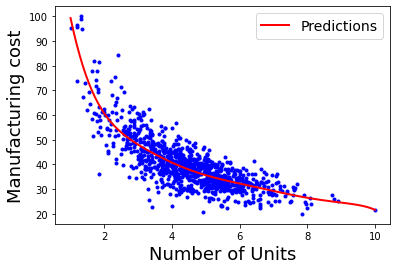

In [ ]:
# Creamos puntos para la gráfica a partir de función creada
X_base = np.linspace(X.min(),X.max(),100).reshape(100,1) # valores en x igualmente espaciados
X_base_pr = pr.fit_transform(X_base) # aplica transformación polinomial de los valores predictores
y_pred = lr_ridge.predict(X_base_pr) # resultado en y (eje horizontal) a partir de datso de entrada con función creada

# Imprimimos los puntos originales
plt.plot(X,y,'b.')

# Imprimimos la función resultante como una línea
plt.plot(X_base, y_pred, "r-", linewidth=2, label="Predictions")
# Imprimimos etiqueta de eje x
plt.xlabel("Number of Units", fontsize=18)
# Imprimimos etiqueta de eje y
plt.ylabel("Manufacturing cost", rotation=90, fontsize=18)
# Agregamos leyenda de línea para identificarla con un nombre
plt.legend(loc="upper right", fontsize=14)

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de entrenamiento
y_pred_ridge_train = lr_ridge.predict(X_train_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
lr_ridge_mae_train = metrics.mean_absolute_error(y_train, y_pred_ridge_train)
lr_ridge_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_ridge_train))
lr_ridge_r2_train = r2_score(y_train, y_pred_ridge_train)

print('Error en datos de entrenamiento:')
print('Error Medio Absoluto (MAE):',lr_ridge_mae_train)
print('Error cuadrático Medio (RMSE):', lr_ridge_rmse_train)
print('r2_score:',lr_ridge_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_ridge_test = lr_ridge.predict(X_test_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datso predecidos y los valores objetivo del conjunto de prueba
lr_ridge_mae_test = metrics.mean_absolute_error(y_test, y_pred_ridge_test)
lr_ridge_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_test))
lr_ridge_r2_test = r2_score(y_test, y_pred_ridge_test)

print('Error en datos de prueba:')
print('Error medio Absoluto (MAE):',lr_ridge_mae_test)
print('Error Cuadrático Medio (RMSE):', lr_ridge_rmse_test)
print('r2_score',lr_ridge_r2_test)

Error en datos de entrenamiento:
Error Medio Absoluto (MAE): 4.412627114658721
Error cuadrático Medio (RMSE): 5.854898632963207
r2_score: 0.6887905545881696

---------------------------

Error en datos de prueba:
Error medio Absoluto (MAE): 4.328368986611877
Error Cuadrático Medio (RMSE): 5.4578764553724595
r2_score 0.7710788349896159


## Lasso

### Modelo

In [ ]:
# Lasso
from sklearn.linear_model import Lasso

# Creación de objeto modelo
lr_lasso = Lasso(fit_intercept = True, alpha = 0.01)

# Transformación de preprocesamiento polinomial (tanto a valores de entrenamiento como de prueba)
pr = PolynomialFeatures(degree = 10) # usamos un modelo con un grado elevado para que la regularización tenga un efecto útil
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

# Entrenamiento del modelo
lr_lasso.fit(X_train_pr,y_train)


# Elementos de su ecuación
print('Coeficientes: ',lr_lasso.coef_)
print('Ordenada al origen: ',lr_lasso.intercept_)


Coeficientes:  [ 0.00000000e+00 -2.60799191e+01  2.52894552e+00  5.29169005e-02
 -7.32014938e-03 -8.62407999e-04 -4.30414094e-05  4.37639848e-07
  2.92016418e-07  2.91825362e-08  1.40996115e-09]
Ordenada al origen:  103.77158872148755


c:\Users\PC\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.631e+04, tolerance: 9.914e+00
  model = cd_fast.enet_coordinate_descent(


### Ecuación

In [ ]:
# Impresión de ecuación
print('\hat{y} = ',end = ' ')

for i, x in enumerate(lr_lasso.coef_):
  if i == 0:
    print(round(lr_lasso.intercept_,5),end = ' ')
  elif i == 1:
    if x >= 0:
      print(' + ' + str(round(x,5)) + 'X',end = ' ')
    else:
      print(str(round(x,5)) + 'X',end = ' ')
  else:
    if x >= 0:
      print(' + ' + str(round(x,5)) + 'X^' + str(i),end = ' ')
    else:
      print(str(round(x,5)) + 'X^' + str(i),end = ' ')

\hat{y} =  103.77159 -26.07992X  + 2.52895X^2  + 0.05292X^3 -0.00732X^4 -0.00086X^5 -4e-05X^6  + 0.0X^7  + 0.0X^8  + 0.0X^9  + 0.0X^10 

Ecuación resultante:

$\hat{y} = 103.77 -26.08X -2.53X^2 + 0.053X^3 -0.0073X^4 - 0.00086X^5 -0.000043X^6 + 0.00000044X^7 + 0.00000029X^8 + 0.000000029X^9 - 0.0000000014X^10$

### Vissualización

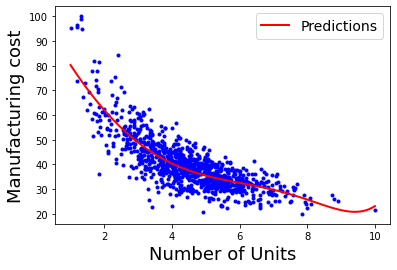

In [ ]:
# Creamos puntos para la gráfica a partir de función creada
X_base = np.linspace(X.min(),X.max(),100).reshape(100,1) # valores en x igualmente espaciados
X_base_pr = pr.fit_transform(X_base) # aplica transformación polinomial de los valores predictores
y_pred = lr_lasso.predict(X_base_pr) # resultado en y (eje horizontal) a partir de datso de entrada con función creada

# Imprimimos los puntos originales
plt.plot(X,y,'b.')

# Imprimimos la función resultante como una línea
plt.plot(X_base, y_pred, "r-", linewidth=2, label="Predictions")
# Imprimimos etiqueta de eje x
plt.xlabel("Number of Units", fontsize=18)
# Imprimimos etiqueta de eje y
plt.ylabel("Manufacturing cost", rotation=90, fontsize=18)
# Agregamos leyenda de línea para identificarla con un nombre
plt.legend(loc="upper right", fontsize=14)

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de entrenamiento
y_pred_lasso_train = lr_lasso.predict(X_train_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datso predecidos y los valores objetivo del conjunto de prueba
lr_lasso_mae_train = metrics.mean_absolute_error(y_train, y_pred_lasso_train)
lr_lasso_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lasso_train))
lr_lasso_r2_train = r2_score(y_train, y_pred_lasso_train)

print('Error en datos de entrenamiento:')
print('Error medio Absoluto (MAE):', lr_lasso_mae_train)
print('Error Cuadrático Medio (RMSE):', lr_lasso_rmse_train)
print('r2_score:', lr_lasso_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_lasso_test = lr_lasso.predict(X_test_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datso predecidos y los valores objetivo del conjunto de prueba
lr_lasso_mae_test = metrics.mean_absolute_error(y_test, y_pred_lasso_test)
lr_lasso_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_test))
lr_lasso_r2_test = r2_score(y_test, y_pred_lasso_test)

print('Error en datos de prueba:')
print('Error medio Absoluto (MAE):', lr_lasso_mae_test)
print('Error Cuadrático Medio (RMSE):', lr_lasso_rmse_test)
print('r2_score:', lr_lasso_r2_test)

Error en datos de entrenamiento:
Error medio Absoluto (MAE): 4.4611776993955745
Error Cuadrático Medio (RMSE): 5.972399601379161
r2_score: 0.676173993270647

---------------------------

Error en datos de prueba:
Error medio Absoluto (MAE): 4.420606052022609
Error Cuadrático Medio (RMSE): 5.569943124281062
r2_score: 0.7615814364819722


## Gráfica de métricas

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [ ]:
# Creamos DataFrame con las mpetricas
df_metrics = pd.DataFrame({'R. Lineal':[lr_mae_train,lr_r2_train,lr_mae_test,lr_r2_test],'R. Polinomial \n(Grado 2)':[pr_mae_train,pr_r2_train,pr_mae_test,pr_r2_test],'R. Ridge':[lr_ridge_mae_train,lr_ridge_r2_train, lr_ridge_mae_test,lr_ridge_r2_test],'R. Lasso':[lr_lasso_mae_train,lr_lasso_r2_train, lr_lasso_mae_test,lr_lasso_r2_test]},index=['MAE_train','R^2_train','MAE_test','R^2_test'])
df_metrics = df_metrics.transpose()
df_metrics

MAE_train  R^2_train  MAE_test  R^2_test
R. Lineal                   4.905332   0.574652  5.013588  0.611625
R. Polinomial \n(Grado 2)   4.545086   0.655228  4.383303  0.738550
R. Ridge                    4.412627   0.688791  4.328369  0.771079
R. Lasso                    4.461178   0.676174  4.420606  0.761581

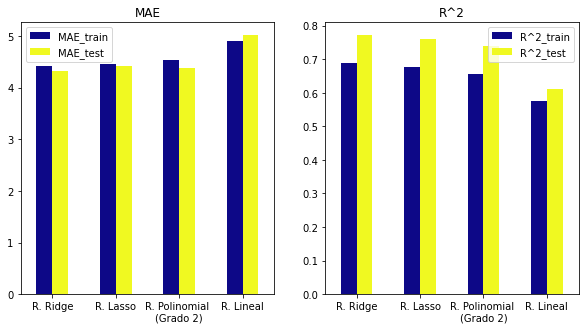

In [ ]:
# Creamos subplots
fig,ax = plt.subplots(1,2,figsize=(10,5))

# Establecemos tema
cmap = plt.get_cmap('plasma')

# Impresión de datos de MAE
df_metrics[['MAE_train','MAE_test']].sort_values(['MAE_train','MAE_test']).plot.bar(title = 'MAE', rot = 0, ax = ax[0], cmap = cmap)

# Impresión de datos de R^2
df_metrics[['R^2_train','R^2_test']].sort_values(['R^2_train','R^2_test'], ascending = False).plot.bar(title = 'R^2', rot = 0, ax = ax[1], cmap = cmap)
plt.show()

## Explicación de resultados

Explica tus resultados, ¿qué método conviene más a la empresa?, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación?, ¿qué error tienes?, ¿es bueno?, ¿cómo lo sabes?

Con base en los resultados obtenidos, se puede decir que el método más conveniente para la empresa sería la aplicación de una regresión polinomial (de un grado elevado) regularizado por medio de Ridge (L2) con el uso de un conjunto de prueba del 10% de los datos (100 registros), es decir, utilizando el 90% de los datos para el entrenamiento del modelo; aunque cabe resaltar que la modificaión de el tamaño del conjunt ode entrebamiento (entre el 70% y 90%) no generó cambios importantes en cuestión de desempeño de los modelos.

En primer lugar, esta decisión queda sustentada en el hecho de que el modelo Ridge obtuvo los mejores balores de métricas tanto para R^2 como para MAE, obteniendo el valor mayor para el primer caso y el menor paar el segundo.

Adicionalmente en cuanto a su desempeño, se puede decir que el modelo Ridge tuvo un comportamiento relativamente bueno ya que según el MAE, sólo varía en 4.4.1 dólares de manera general con respecto al valor real (aunque esto tendría que ser validado con los intervalos de tolerancia de la empresa). Aunado a esto, al observar la diferencia entre los valores de entrenamiento y prueba, se puede observar que es probable que el modelo no esté sobreentrenado (un efecto esperado del modelo Ridge) ya que la diferencia entre los errores es pequeña tanto para la métrica de MAE como la de R^2.

Con respecto a la métrica R^2 se puede observar un comportamiento cercano a 1 (entre 0.7 y 0.8) lo cual, según la literatura, indica un valor apropiado de R^2 (aunque igualmenet esto queda subordinado a los criterios propios de la empresa).

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

id             date      price  bedrooms  bathrooms  \
5954   7852020250  20140602T000000   725995.0         4       2.50   
8610   6392002020  20150324T000000   559000.0         3       1.75   
7650    626049058  20150504T000000   275000.0         5       2.50   
5683   2202500255  20150305T000000   335000.0         3       2.00   
20773  7304301231  20140617T000000   345000.0         3       2.50   
6959    723000114  20140505T000000  1395000.0         5       3.50   
10784  4104900340  20150204T000000   710000.0         4       2.50   
21529  2487200490  20140623T000000   670000.0         3       2.50   
12319  2386000070  20141029T000000   795127.0         4       3.25   
19948   293070090  20140711T000000   859990.0         4       2.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
5954          3190      7869     2.0           0     2  ...      9   
8610          1700      6500     1.0           0     0  ...      8   
7650          2570     17234     1.0           0     0  ...      7   
5683          1210      9926     1.0           0     0  ...      7   
20773         1680      2229     2.0           0     0  ...      7   
6959          4010      8510     2.0           0     1  ...      9   
10784         3220     18618     2.0           0     1  ...     10   
21529         3310      5300     2.0           0     2  ...      8   
12319         4360     91158     1.0           0     0  ...     10   
19948         3520      5500     2.0           0     0  ...      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
5954         3190              0      2001             0    98065  47.5317   
8610         1700              0      1967             0    98115  47.6837   
7650         1300           1270      1959             0    98133  47.7753   
5683         1210              0      1954          2015    98006  47.5731   
20773        1680              0      2007             0    98155  47.7484   
6959         2850           1160      1971             0    98105  47.6578   
10784        3220              0      1991             0    98056  47.5326   
21529        2440            870      2008             0    98136  47.5178   
12319        3360           1000      1993             0    98053  47.6398   
19948        3520              0      2014             0    98074  47.6181   

          long  sqft_living15  sqft_lot15  
5954  -121.866           2630        6739  
8610  -122.284           1880        6000  
7650  -122.355           1760        7969  
5683  -122.135           1690        9737  
20773 -122.322           1230        9300  
6959  -122.286           2610        6128  
10784 -122.181           2650       11896  
21529 -122.389           2140        7500  
12319 -121.985           3540       90940  
19948 -122.056           3340        5500  

[10 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


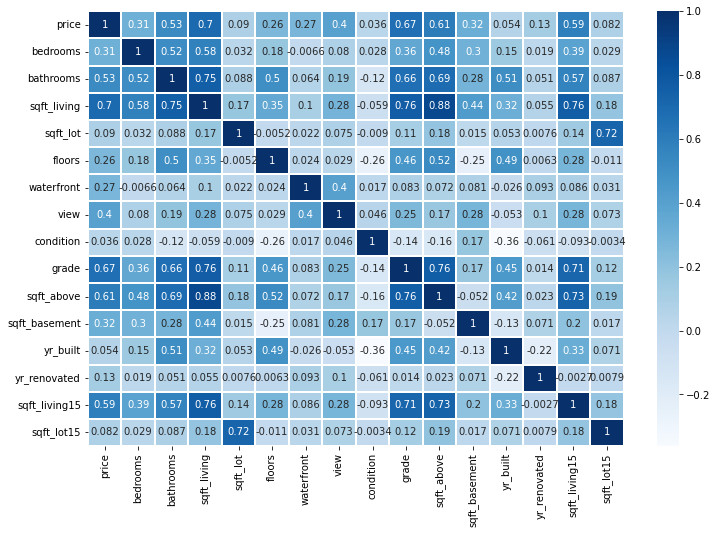

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths = 2) # modificamos el mapa de color para poder observar con mayor facilidad las correlaciones
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#tu codigo aquí

## Regresión lineal

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### Modelo

In [ ]:
#lineal
lr = LinearRegression(fit_intercept=True)

# Entrenamos el modelo
lr.fit(X_train,y_train)

# Elementos de su ecuación
print('Pendiente: ',lr.coef_)
print('Ordenada al origen: ',lr.intercept_)

Pendiente:  [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175566e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Ordenada al origen:  [6151359.26274143]


### Ecuación

In [ ]:
# Impresión de ecuación
print('\hat{y} = ',end = ' ')
print(round(lr.intercept_[0],5),end = ' ')

for g, n in enumerate(lr.coef_):
  for i, x in enumerate(n):
    if g == 0:
      if x >= 0:
        print(' + ' + str(np.around(x,5)) + 'X_' + str(i+1),end = ' ')
      else:
        print(str(np.around(x,5)) + 'X_' + str(i+1),end = ' ')
    else:
      if x >= 0:
        print(' + ' + str(np.around(x,5)) + 'X_' + str(i+1) + '^' + str(g),end = ' ')
      else:
        print(str(np.around(x,5)) + 'X_' + str(i+1) + '^' + str(g),end = ' ')

\hat{y} =  6151359.26274 -38200.80483X_1  + 41466.13803X_2  + 107.99258X_3  + 0.01714X_4  + 31691.69131X_5  + 552691.02332X_6  + 41249.32275X_7  + 21222.14426X_8  + 119493.21585X_9  + 47.77503X_10  + 60.21756X_11 -3550.90216X_12  + 13.26022X_13  + 29.00593X_14 -0.54813X_15 

Ecuación resultante:

$\hat{y} =  6151359.26274 -38200.80483X_1  + 41466.13803X_2  + 107.99258X_3  + 0.01714X_4  + 31691.69131X_5  + 552691.02332X_6  + 41249.32275X_7  + 21222.14426X_8  + 119493.21585X_9  + 47.77503X_10  + 60.21756X_11 -3550.90216X_12  + 13.26022X_13  + 29.00593X_14 -0.54813X_15$

### Visualizaciones

In [ ]:
X_base = list()
for col in X_train.columns:
  X_base.append(np.linspace(X_train[col].min(),X_train[col].max(),100).reshape(100,1)) # valores en x igualmente espaciados

# Conjuntamos todos los valores igualmente espaciados generados por cada variable
X_base = pd.DataFrame(np.transpose(np.squeeze(X_base)),columns = X_train.columns)

In [ ]:
# Valores predecidos con regresión lineal multivariable
y_pred_lr = lr.predict(X_base) # resultado en y (eje horizontal) a partir de datso de entrada con función creada

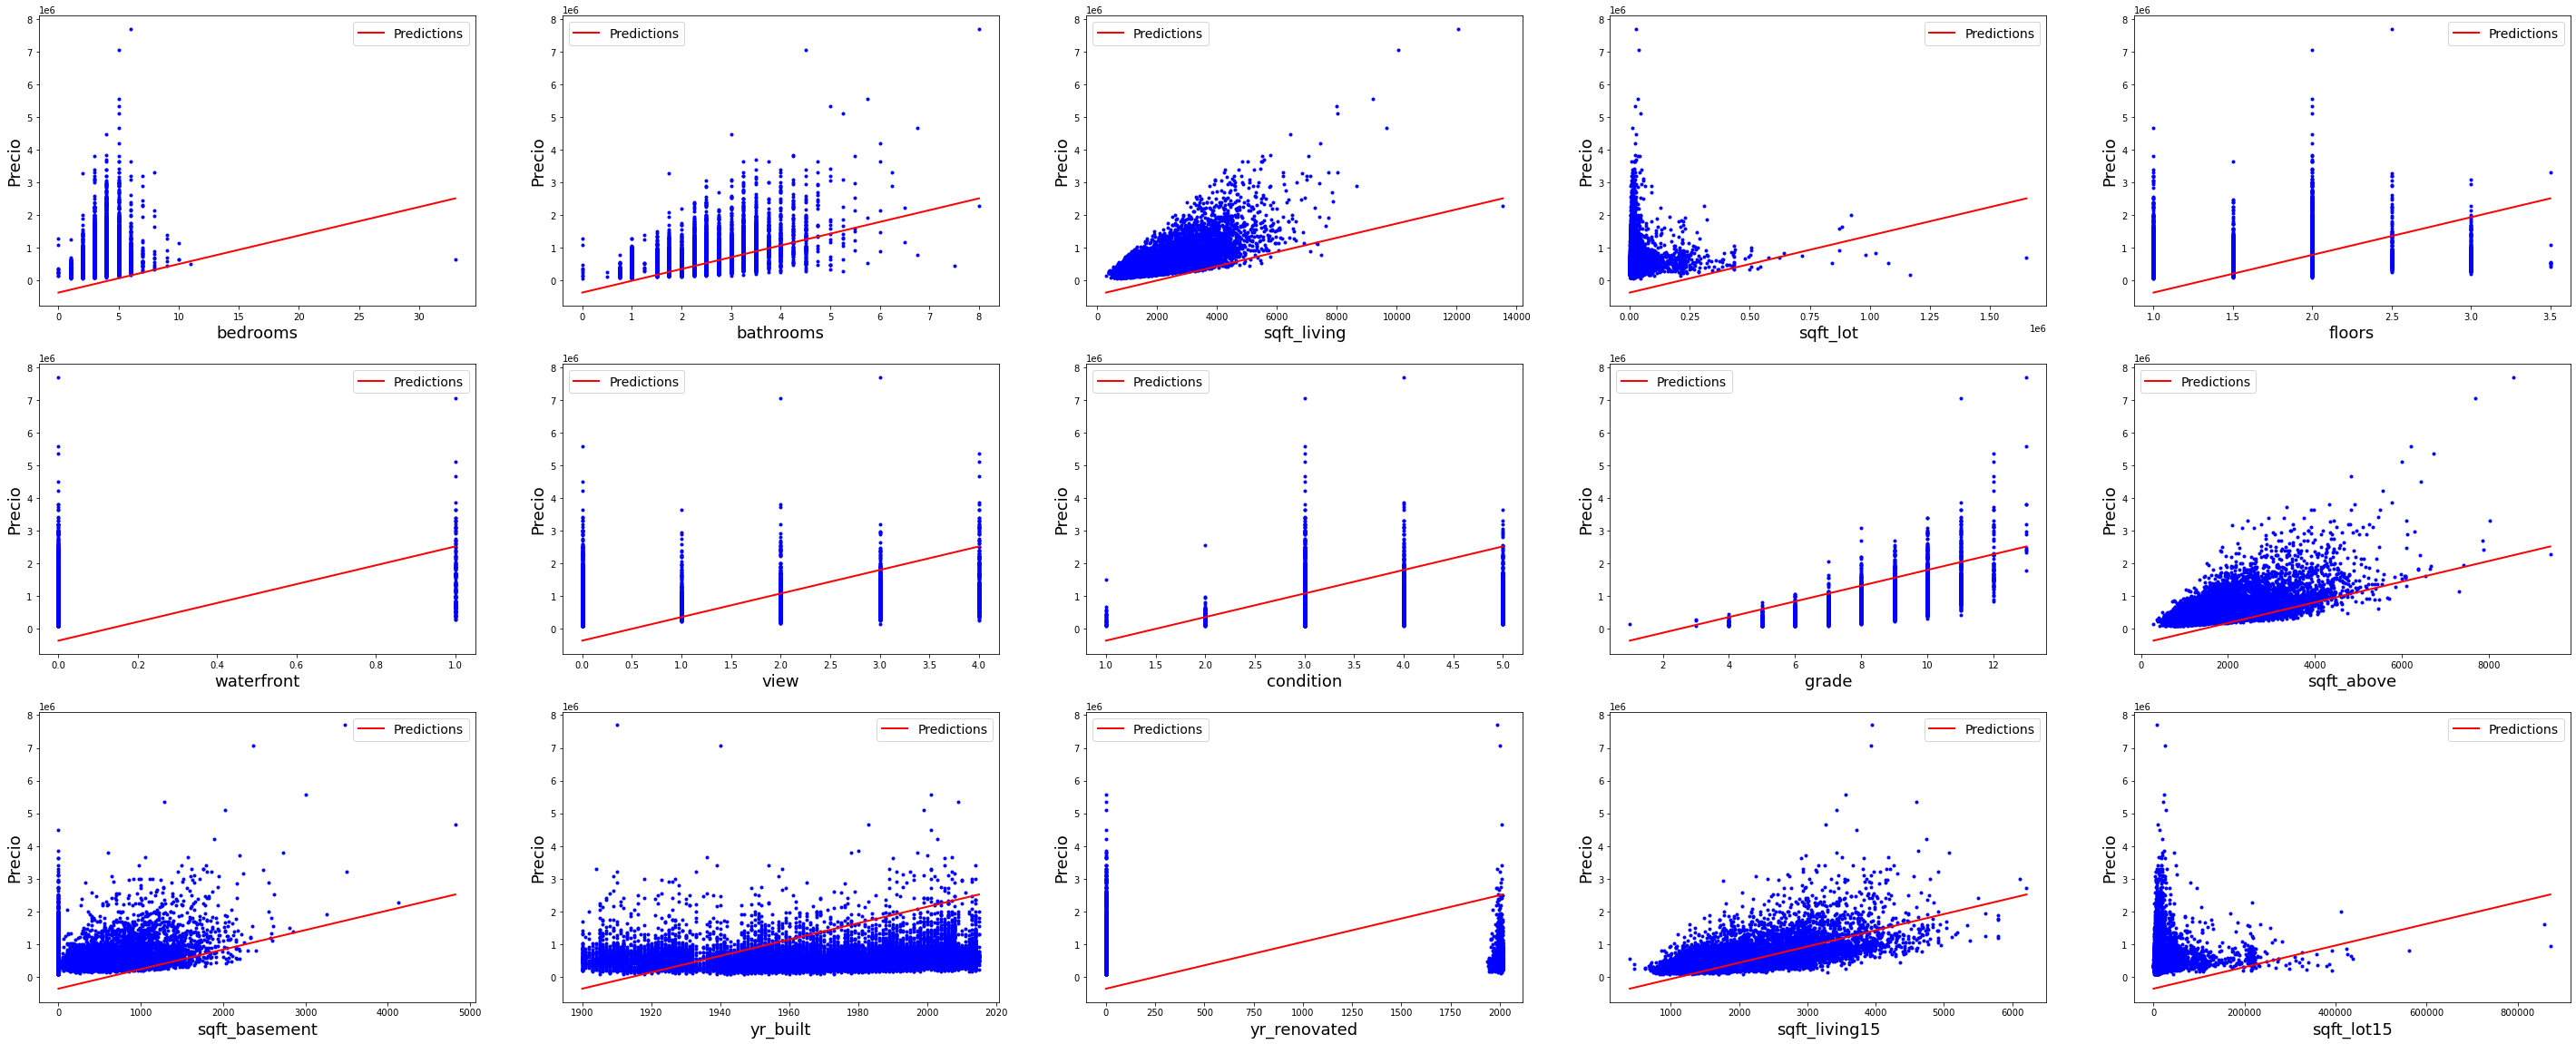

In [ ]:
fig, ax = plt.subplots(3,5, figsize = (50,20))

for i, col in enumerate(X_train.columns):
  # Creamos puntos para la gráfica a partir de función creada

  plt.subplot(3,5,i+1) 

  # Imprimimos los puntos originales
  plt.plot(X_train[col],y_train,'b.')

  # Imprimimos la función resultante como una línea
  plt.plot(X_base[col], y_pred_lr, "r-", linewidth=2, label="Predictions")
  # Imprimimos etiqueta de eje x
  plt.xlabel("{}".format(col), fontsize=18)
  # Imprimimos etiqueta de eje y
  plt.ylabel("Precio", rotation=90, fontsize=18)
  # Agregamos leyenda de línea para identificarla con un nombre
  plt.legend(loc="best", fontsize=14)

plt.show()

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de prueba
y_pred_lr_train = lr.predict(X_train)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
lr_mae_train = metrics.mean_absolute_error(y_train, y_pred_lr_train)
lr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr_train))
lr_r2_train = r2_score(y_train, y_pred_lr_train)

print('Error en datos de entrenamiento:')
print('Error Medio Absoluto (MAE):', lr_mae_train)
print('Error Cuadrático Medio (RMSE):', lr_rmse_train)
print('r2_score:',lr_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_lr_test = lr.predict(X_test)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
lr_mae_test = metrics.mean_absolute_error(y_test, y_pred_lr_test)
lr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_test))
lr_r2_test = r2_score(y_test, y_pred_lr_test)

print('Error en datos de prueba:')
print('Error Medio Absoluto (MAE):', lr_mae_test)
print('Error Cuadrático Medio (RMSE):', lr_rmse_test)
print('r2_score:',lr_r2_test)

Error en datos de entrenamiento:
Error Medio Absoluto (MAE): 139269.3293911534
Error Cuadrático Medio (RMSE): 214234.8822754647
r2_score: 0.6529196653133834

---------------------------

Error en datos de prueba:
Error Medio Absoluto (MAE): 137480.1388273228
Error Cuadrático Medio (RMSE): 232133.36762408644
r2_score: 0.6579723205007473


## Regresión polinomial

Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### Modelo

In [ ]:
#polinomial

# Creación de objeto modelo
lrp = LinearRegression(fit_intercept = True)

# Transformación de preprocesamiento polinomial (tanto a valores de entrenamiento como de prueba)
pr = PolynomialFeatures(degree = 2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

# Entrenamiento del modelo
lrp.fit(X_train_pr,y_train)


# Elementos de su ecuación
print('Coeficientes: ',lrp.coef_)
print('Ordenada al origen: ',lrp.intercept_)


Coeficientes:  [[-3.36188619e+02  9.33888703e+05 -1.09286036e+06 -5.13353274e+02
  -2.78639920e+01 -2.07432924e+06 -3.95459906e+06 -2.88610308e+05
   5.58610258e+05  1.09861754e+06 -1.62986321e+02 -3.25485690e+02
  -8.59674040e+04 -2.95360091e+03  3.99966881e+03 -3.40102075e+01
   9.57422354e+02  7.49995594e+03 -1.44267613e+01 -1.86725423e-02
   8.57627302e+03 -1.14890406e+04 -3.07821968e+02 -5.24593268e+03
  -5.36710999e+03 -5.78887081e-01 -1.39771329e+01 -4.67085372e+02
  -9.13116230e+00  1.72778843e+01  2.15712580e-01 -9.63168948e+03
   1.55132397e+01 -1.35601107e-01 -2.59050933e+04  4.33683544e+04
   3.83043565e+03 -1.07816553e+03  2.22979350e+04  1.42995857e+01
   1.21356742e+00  5.03169373e+02 -1.70839822e+01 -1.72882390e+01
  -5.58303144e-02 -1.03188439e+00 -4.05234155e+00  4.83372386e+00
   1.60300184e+02 -1.42689040e+01  1.31167407e+01  2.07363013e+01
   2.03803789e+00  3.65216115e-01  3.38709835e-01 -3.22226850e-04
  -3.54591574e-01  1.78896876e+00  3.06870788e-07  4.40850225

### Ecuación

In [ ]:
# Generamos ecuación con variables de PolynomialFeatures
print('\hat{y} = ',end = ' ')
print(round(lrp.intercept_[0],5),end = ' ')

vars = [x.replace(' ','*') for x in pr.get_feature_names_out()]
for coef,feat in zip(lrp.coef_[0],vars):
  print(str(round(coef,5)) + '*' + str(feat) + ' +')

\hat{y} =  80231794.19383 -336.18862*1 +
933888.70272*bedrooms +
-1092860.35514*bathrooms +
-513.35327*sqft_living +
-27.86399*sqft_lot +
-2074329.23896*floors +
-3954599.05727*waterfront +
-288610.30771*view +
558610.25849*condition +
1098617.54032*grade +
-162.98632*sqft_above +
-325.48569*sqft_basement +
-85967.40399*yr_built +
-2953.60091*yr_renovated +
3999.66881*sqft_living15 +
-34.01021*sqft_lot15 +
957.42235*bedrooms^2 +
7499.95594*bedrooms*bathrooms +
-14.42676*bedrooms*sqft_living +
-0.01867*bedrooms*sqft_lot +
8576.27302*bedrooms*floors +
-11489.04058*bedrooms*waterfront +
-307.82197*bedrooms*view +
-5245.93268*bedrooms*condition +
-5367.10999*bedrooms*grade +
-0.57889*bedrooms*sqft_above +
-13.97713*bedrooms*sqft_basement +
-467.08537*bedrooms*yr_built +
-9.13116*bedrooms*yr_renovated +
17.27788*bedrooms*sqft_living15 +
0.21571*bedrooms*sqft_lot15 +
-9631.68948*bathrooms^2 +
15.51324*bathrooms*sqft_living +
-0.1356*bathrooms*sqft_lot +
-25905.09329*bathrooms*floors +
43368.

Ecuación resultante:

$\hat{y} =  80233537.22739 -336.21507 +
933786.60085 bedrooms +
-1092760.11537 bathrooms +
-500.00092 sqft_living +
-27.86558 sqft_lot +
-2074318.75934 floors +
-3954542.07664 waterfront +
-288626.04557 view +
558593.03187 condition +
1098606.35431 grade +
-176.30638 sqft_above +
-338.8301 sqft_basement +
-85969.07419 yr_built +
-2953.64696 yr_renovated +
3999.66813 sqft_living15 +
-34.0101 sqft_lot15 +
957.35309 bedrooms^2 +
7495.73773 bedrooms*bathrooms +
-14.31299 bedrooms*sqft_living +
-0.01861 bedrooms*sqft_lot +
8577.65264 bedrooms*floors +
-11502.39776 bedrooms*waterfront +
-307.5687 bedrooms*view +
-5244.25041 bedrooms*condition +
-5367.56662 bedrooms*grade +
-0.69038 bedrooms*sqft_above +
-14.08831 bedrooms*sqft_basement +
-467.02705 bedrooms*yr_built +
-9.12672 bedrooms*yr_renovated +
17.27746 bedrooms*sqft_living15 +
0.21569 bedrooms*sqft_lot15 +
-9630.18996 bathrooms^2 +
15.54346 bathrooms*sqft_living +
-0.13576 bathrooms*sqft_lot +
-25906.93521 bathrooms*floors +
43371.0369 bathrooms*waterfront +
3829.65496 bathrooms*view +
-1079.45148 bathrooms*condition +
22297.40575 bathrooms*grade +
14.27147 bathrooms*sqft_above +
1.18111 bathrooms*sqft_basement +
503.11365 bathrooms*yr_built +
-17.0855 bathrooms*yr_renovated +
-17.28748 bathrooms*sqft_living15 +
-0.05573 bathrooms*sqft_lot15 +
-0.4953 sqft_living^2 +
-1.18374 sqft_living*sqft_lot +
4.83455 sqft_living*floors +
160.30063 sqft_living*waterfront +
-14.2702 sqft_living*view +
13.11576 sqft_living*condition +
20.73627 sqft_living*grade +
-3.88265 sqft_living*sqft_above +
1.77535 sqft_living*sqft_basement +
3.44719 sqft_living*yr_built +
0.02909 sqft_living*yr_renovated +
-2.87309 sqft_living*sqft_living15 +
-1.69344 sqft_living*sqft_lot15 +
0.0 sqft_lot^2 +
0.44084 sqft_lot*floors +
-0.09851 sqft_lot*waterfront +
-0.09759 sqft_lot*view +
0.09172 sqft_lot*condition +
0.15195 sqft_lot*grade +
1.18305 sqft_lot*sqft_above +
1.18327 sqft_lot*sqft_basement +
0.01376 sqft_lot*yr_built +
-0.00015 sqft_lot*yr_renovated +
0.00018 sqft_lot*sqft_living15 +
0.0 sqft_lot*sqft_lot15 +
21610.28166 floors^2 +
-131323.61 floors*waterfront +
14441.43059 floors*view +
20301.45208 floors*condition +
-4279.52652 floors*grade +
-2.82333 floors*sqft_above +
7.66118 floors*sqft_basement +
1036.77935 floors*yr_built +
2.59523 floors*yr_renovated +
-32.04074 floors*sqft_living15 +
-0.52861 floors*sqft_lot15 +
-3954540.19829 waterfront^2 +
-16050.83378 waterfront*view +
9199.49119 waterfront*condition +
-161638.71665 waterfront*grade +
183.10316 waterfront*sqft_above +
-22.80249 waterfront*sqft_basement +
4428.59231 waterfront*yr_built +
-29.91365 waterfront*yr_renovated +
170.60522 waterfront*sqft_living15 +
-0.81346 waterfront*sqft_lot15 +
7984.49145 view^2 +
7339.72187 view*condition +
17955.5207 view*grade +
-12.49692 view*sqft_above +
-1.77411 view*sqft_basement +
72.06545 view*yr_built +
-9.96849 view*yr_renovated +
4.6336 view*sqft_living15 +
-0.05245 view*sqft_lot15 +
-541.70987 condition^2 +
-6037.96704 condition*grade +
1.16203 condition*sqft_above +
11.95559 condition*sqft_basement +
-307.02425 condition*yr_built +
-20.1989 condition*yr_renovated +
46.32005 condition*sqft_living15 +
-0.2769 condition*sqft_lot15 +
7366.28623 grade^2 +
9.59804 grade*sqft_above +
11.13678 grade*sqft_basement +
-571.96703 grade*yr_built +
-10.13411 grade*yr_renovated +
-22.75564 grade*sqft_living15 +
-0.50858 grade*sqft_lot15 +
4.38329 sqft_above^2 +
3.13327 sqft_above*sqft_basement +
-3.20762 sqft_above*yr_built +
0.00908 sqft_above*yr_renovated +
2.87101 sqft_above*sqft_living15 +
1.69363 sqft_above*sqft_lot15 +
-1.3418 sqft_basement^2 +
-3.10647 sqft_basement*yr_built +
0.01571 sqft_basement*yr_renovated +
2.87625 sqft_basement*sqft_living15 +
1.69293 sqft_basement*sqft_lot15 +
23.06133 yr_built^2 +
0.40703 yr_built*yr_renovated +
-2.04696 yr_built*sqft_living15 +
0.01889 yr_built*sqft_lot15 +
1.11629 yr_renovated^2 +
0.04712 yr_renovated*sqft_living15 +
0.00025 yr_renovated*sqft_lot15 +
0.03315 sqft_living15^2 +
0.00011 sqft_living15*sqft_lot15 +
0.0 sqft_lot15^2 +$

### Visualizaciones

In [ ]:
# Creamo DataFrame de valores transformados
features = pd.DataFrame(X_train_pr, columns=vars)

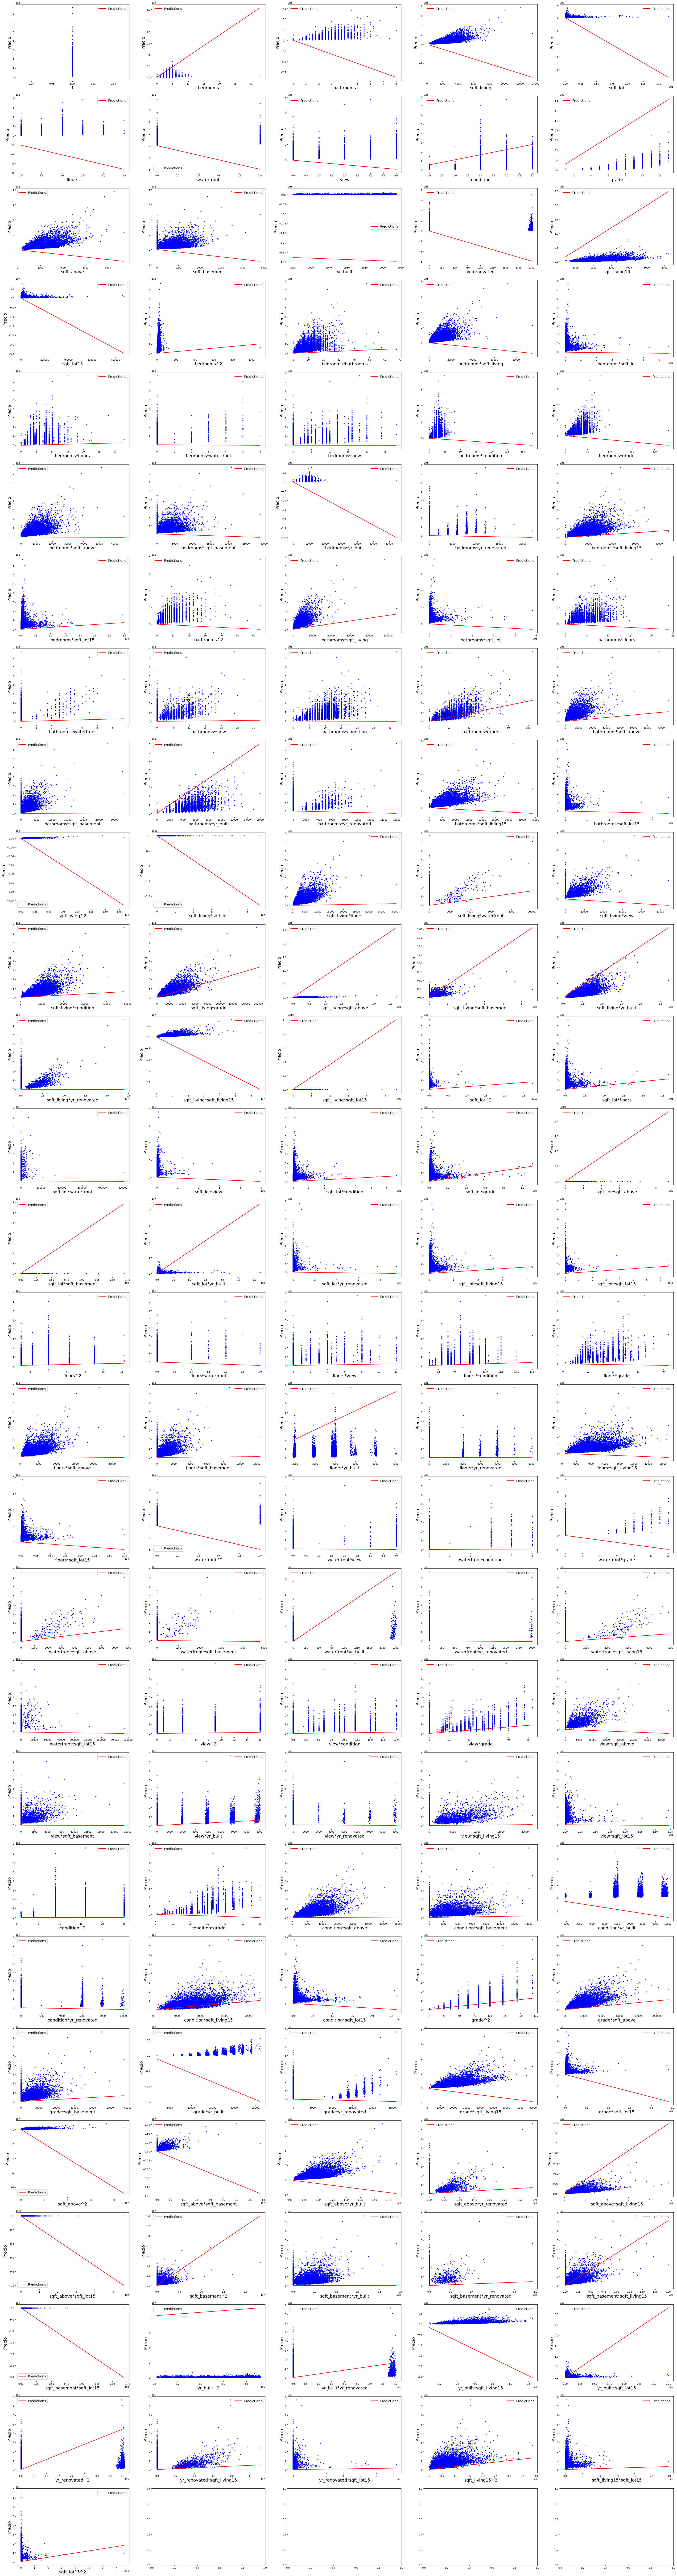

In [ ]:
fig, ax = plt.subplots(28,5, figsize = (50,200))

# Obtenemos ecuaciones parciales
for i, (coef, col) in enumerate(zip(lrp.coef_[0],vars)):

  plt.subplot(28,5,i+1) 

  # Imprimimos los puntos originales
  plt.plot(features[col],y_train,'b.')

  X_base = np.linspace(features[col].min(),features[col].max(),100).reshape(100,1)
  y_pred_lrp = coef*X_base + (lrp.coef_[0][0])

  # Imprimimos la función resultante como una línea
  plt.plot(X_base, y_pred_lrp, "r-", linewidth=2, label="Predictions")
  # Imprimimos etiqueta de eje x
  plt.xlabel("{}".format(col), fontsize=18)
  # Imprimimos etiqueta de eje y
  plt.ylabel("Precio", rotation=90, fontsize=18)
  # Agregamos leyenda de línea para identificarla con un nombre
  plt.legend(loc="best", fontsize=14)

plt.show()

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de prueba
y_pred_pr_train = lrp.predict(X_train_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
pr_mae_train = metrics.mean_absolute_error(y_train, y_pred_pr_train)
pr_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_pr_train))
pr_r2_train = r2_score(y_train, y_pred_pr_train)

print('Error en datos de entrenamiento:')
print('Error medio Absoluto (MAE):',pr_mae_train)
print('Error Cuadrático Medio (RMSE):', pr_rmse_train)
print('r2_score',pr_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_pr_test = lrp.predict(X_test_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
pr_mae_test = metrics.mean_absolute_error(y_test, y_pred_pr_test)
pr_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_pr_test))
pr_r2_test = r2_score(y_test, y_pred_pr_test)

print('Error en datos de prueba:')
print('Error medio Absoluto (MAE):',pr_mae_test)
print('Error Cuadrático Medio (RMSE):', pr_rmse_test)
print('r2_score',pr_r2_test)

Error en datos de entrenamiento:
Error medio Absoluto (MAE): 123191.51447742508
Error Cuadrático Medio (RMSE): 182926.53050953566
r2_score 0.7469519284685702

---------------------------

Error en datos de prueba:
Error medio Absoluto (MAE): 121313.44033121293
Error Cuadrático Medio (RMSE): 186263.2147026378
r2_score 0.7797883462346452


## Ridge

Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Modelo

In [ ]:
# Ridge
from sklearn.linear_model import Ridge

# Creación de objeto modelo
lr_ridge = Ridge(fit_intercept = True, alpha = 0.01)

# Transformación de preprocesamiento polinomial (tanto a valores de entrenamiento como de prueba)
pr = PolynomialFeatures(degree = 2) # usamos un modelo con un grado elevado para que la regularización tenga un efecto útil
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

# Entrenamiento del modelo
lr_ridge.fit(X_train_pr,y_train)


# Elementos de su ecuación
print('Coeficientes: ',lr_ridge.coef_)
print('Ordenada al origen: ',lr_ridge.intercept_)

Coeficientes:  [[-1.25175898e+04  9.28592927e+05 -1.06290197e+06  1.05245235e+04
  -2.79203765e+01 -1.98190444e+06 -2.81018657e+06 -3.76180002e+05
   5.56180944e+05  1.08362534e+06 -1.12478233e+04 -1.13454947e+04
  -8.62189450e+04 -2.97459978e+03  4.01869541e+03 -3.39235069e+01
   9.60681164e+02  7.39258797e+03  5.98668618e+03 -1.88461445e-02
   8.37300429e+03 -1.57259121e+04 -1.58867940e+02 -5.29232326e+03
  -5.41375986e+03 -6.00155468e+03 -6.01517683e+03 -4.63904246e+02
  -9.00517443e+00  1.71818386e+01  2.15325758e-01 -9.50012512e+03
  -2.85616096e+03 -1.34737159e-01 -2.52712863e+04  5.11134191e+04
   3.20647598e+03 -1.30031639e+03  2.22023986e+04  2.88587955e+03
   2.87311536e+03  4.87854821e+02 -1.72653701e+01 -1.69152811e+01
  -5.68721592e-02 -1.34761952e+04 -9.78638573e+03 -3.02973585e+03
  -2.01695451e+03 -1.52622477e+03 -3.00284774e+03  1.13997672e+04
   7.16925438e+03  7.50705612e+03  1.48931123e+03 -5.87640673e+03
  -5.77649058e+03 -1.16603429e+03  3.11718028e-07  4.42121376

### Ecuación

In [ ]:
# Generamos ecuación con variables de PolynomialFeatures
print('\hat{y} = ',end = ' ')
print(round(lr_ridge.intercept_[0],5),end = ' ')

vars = [x.replace(' ','*') for x in pr.get_feature_names_out()]
for coef,feat in zip(lr_ridge.coef_[0],vars):
  print(str(round(coef,5)) + '*' + str(feat) + ' +')

\hat{y} =  80482270.72098 -12517.58981*1 +
928592.92691*bedrooms +
-1062901.96827*bathrooms +
10524.52351*sqft_living +
-27.92038*sqft_lot +
-1981904.43543*floors +
-2810186.56865*waterfront +
-376180.0016*view +
556180.94401*condition +
1083625.33946*grade +
-11247.82335*sqft_above +
-11345.49469*sqft_basement +
-86218.94501*yr_built +
-2974.59978*yr_renovated +
4018.69541*sqft_living15 +
-33.92351*sqft_lot15 +
960.68116*bedrooms^2 +
7392.58797*bedrooms*bathrooms +
5986.68618*bedrooms*sqft_living +
-0.01885*bedrooms*sqft_lot +
8373.00429*bedrooms*floors +
-15725.91212*bedrooms*waterfront +
-158.86794*bedrooms*view +
-5292.32326*bedrooms*condition +
-5413.75986*bedrooms*grade +
-6001.55468*bedrooms*sqft_above +
-6015.17683*bedrooms*sqft_basement +
-463.90425*bedrooms*yr_built +
-9.00517*bedrooms*yr_renovated +
17.18184*bedrooms*sqft_living15 +
0.21533*bedrooms*sqft_lot15 +
-9500.12512*bathrooms^2 +
-2856.16096*bathrooms*sqft_living +
-0.13474*bathrooms*sqft_lot +
-25271.2863*bathrooms*

Ecuación resultante:

$\hat{y} =  80482270.72098 -12517.58981*1 +
928592.92691*bedrooms +
-1062901.96827*bathrooms +
10524.52351*sqft_living +
-27.92038*sqft_lot +
-1981904.43543*floors +
-2810186.56865*waterfront +
-376180.0016*view +
556180.94401*condition +
1083625.33946*grade +
-11247.82335*sqft_above +
-11345.49469*sqft_basement +
-86218.94501*yr_built +
-2974.59978*yr_renovated +
4018.69541*sqft_living15 +
-33.92351*sqft_lot15 +
960.68116*bedrooms^2 +
7392.58797*bedrooms*bathrooms +
5986.68618*bedrooms*sqft_living +
-0.01885*bedrooms*sqft_lot +
8373.00429*bedrooms*floors +
-15725.91212*bedrooms*waterfront +
-158.86794*bedrooms*view +
-5292.32326*bedrooms*condition +
-5413.75986*bedrooms*grade +
-6001.55468*bedrooms*sqft_above +
-6015.17683*bedrooms*sqft_basement +
-463.90425*bedrooms*yr_built +
-9.00517*bedrooms*yr_renovated +
17.18184*bedrooms*sqft_living15 +
0.21533*bedrooms*sqft_lot15 +
-9500.12512*bathrooms^2 +
-2856.16096*bathrooms*sqft_living +
-0.13474*bathrooms*sqft_lot +
-25271.2863*bathrooms*floors +
51113.41911*bathrooms*waterfront +
3206.47598*bathrooms*view +
-1300.31639*bathrooms*condition +
22202.39862*bathrooms*grade +
2885.87955*bathrooms*sqft_above +
2873.11536*bathrooms*sqft_basement +
487.85482*bathrooms*yr_built +
-17.26537*bathrooms*yr_renovated +
-16.91528*bathrooms*sqft_living15 +
-0.05687*bathrooms*sqft_lot15 +
-13476.1952*sqft_living^2 +
-9786.38573*sqft_living*sqft_lot +
-3029.73585*sqft_living*floors +
-2016.95451*sqft_living*waterfront +
-1526.22477*sqft_living*view +
-3002.84774*sqft_living*condition +
11399.76724*sqft_living*grade +
7169.25438*sqft_living*sqft_above +
7507.05612*sqft_living*sqft_basement +
1489.31123*sqft_living*yr_built +
-5876.40673*sqft_living*yr_renovated +
-5776.49058*sqft_living*sqft_living15 +
-1166.03429*sqft_living*sqft_lot15 +
0.0*sqft_lot^2 +
0.44212*sqft_lot*floors +
-0.10944*sqft_lot*waterfront +
-0.09737*sqft_lot*view +
0.09182*sqft_lot*condition +
0.15159*sqft_lot*grade +
9786.38504*sqft_lot*sqft_above +
9786.38527*sqft_lot*sqft_basement +
0.01379*sqft_lot*yr_built +
-0.00014*sqft_lot*yr_renovated +
0.00017*sqft_lot*sqft_living15 +
0.0*sqft_lot*sqft_lot15 +
21920.56862*floors^2 +
-120748.7079*floors*waterfront +
14298.51159*floors*view +
19441.05745*floors*condition +
-4268.63443*floors*grade +
3031.69202*floors*sqft_above +
3042.01421*floors*sqft_basement +
990.8113*floors*yr_built +
1.51385*floors*yr_renovated +
-32.04206*floors*sqft_living15 +
-0.53295*floors*sqft_lot15 +
-2787449.17634*waterfront^2 +
-14681.74791*waterfront*view +
-3378.82271*waterfront*condition +
-153567.97713*waterfront*grade +
2355.68152*waterfront*sqft_above +
2157.30131*waterfront*sqft_basement +
3233.42209*waterfront*yr_built +
-44.31078*waterfront*yr_renovated +
168.67993*waterfront*sqft_living15 +
-0.81061*waterfront*sqft_lot15 +
8007.96152*view^2 +
8028.99419*view*condition +
17855.71368*view*grade +
1499.56051*view*sqft_above +
1510.27394*view*sqft_basement +
116.21624*view*yr_built +
-9.01705*view*yr_renovated +
4.63259*view*sqft_living15 +
-0.05599*view*sqft_lot15 +
-635.43519*condition^2 +
-5999.91844*condition*grade +
3017.99657*condition*sqft_above +
3027.83226*condition*sqft_basement +
-305.05686*condition*yr_built +
-20.04589*condition*yr_renovated +
45.92783*condition*sqft_living15 +
-0.27765*condition*sqft_lot15 +
7332.46093*grade^2 +
-11369.30283*grade*sqft_above +
-11367.80301*grade*sqft_basement +
-563.99206*grade*yr_built +
-9.93407*grade*yr_renovated +
-22.89424*grade*sqft_living15 +
-0.50939*grade*sqft_lot15 +
6306.94609*sqft_above^2 +
12276.11509*sqft_above*sqft_basement +
-1489.04993*sqft_above*yr_built +
5876.44532*sqft_above*yr_renovated +
5776.48847*sqft_above*sqft_living15 +
1166.03448*sqft_above*sqft_lot15 +
5969.0774*sqft_basement^2 +
-1488.97966*sqft_basement*yr_built +
5876.45098*sqft_basement*yr_renovated +
5776.49376*sqft_basement*sqft_living15 +
1166.03377*sqft_basement*sqft_lot15 +
23.12553*yr_built^2 +
0.41616*yr_built*yr_renovated +
-2.05546*yr_built*sqft_living15 +
0.01885*yr_built*sqft_lot15 +
1.11767*yr_renovated^2 +
0.04679*yr_renovated*sqft_living15 +
0.00024*yr_renovated*sqft_lot15 +
0.03312*sqft_living15^2 +
0.00012*sqft_living15*sqft_lot15 +
0.0*sqft_lot15^2 +
$

### Visualizaciones

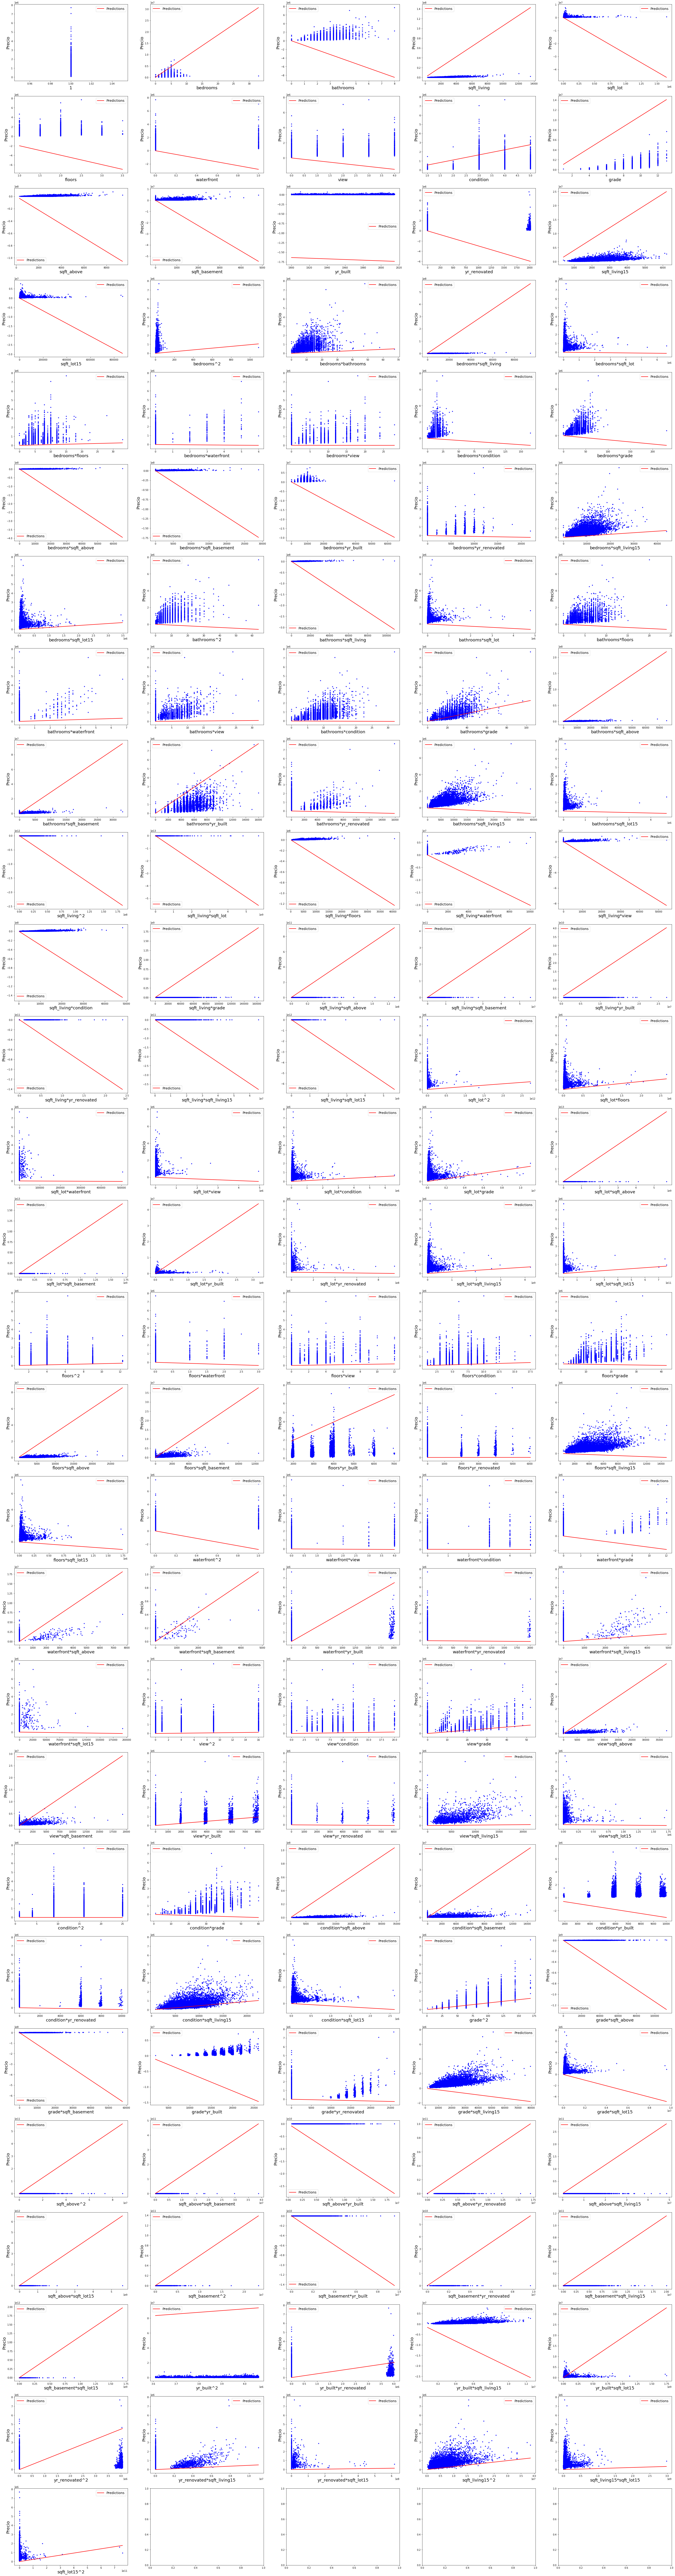

In [ ]:
fig, ax = plt.subplots(28,5, figsize = (50,200))

# Obtenemos ecuaciones parciales
for i, (coef, col) in enumerate(zip(lr_ridge.coef_[0],vars)):

  plt.subplot(28,5,i+1) 

  # Imprimimos los puntos originales
  plt.plot(features[col],y_train,'b.')

  X_base = np.linspace(features[col].min(),features[col].max(),100).reshape(100,1)
  y_pred_lr_ridge = coef*X_base + (lr_ridge.coef_[0][0])

  # Imprimimos la función resultante como una línea
  plt.plot(X_base, y_pred_lr_ridge, "r-", linewidth=2, label="Predictions")
  # Imprimimos etiqueta de eje x
  plt.xlabel("{}".format(col), fontsize=18)
  # Imprimimos etiqueta de eje y
  plt.ylabel("Precio", rotation=90, fontsize=18)
  # Agregamos leyenda de línea para identificarla con un nombre
  plt.legend(loc="best", fontsize=14)

plt.show()

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de entrenamiento
y_pred_ridge_train = lr_ridge.predict(X_train_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datos predecidos y los valores objetivo del conjunto de prueba
lr_ridge_mae_train = metrics.mean_absolute_error(y_train, y_pred_ridge_train)
lr_ridge_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_ridge_train))
lr_ridge_r2_train = r2_score(y_train, y_pred_ridge_train)

print('Error en datos de entrenamiento:')
print('Error Medio Absoluto (MAE):',lr_ridge_mae_train)
print('Error cuadrático Medio (RMSE):', lr_ridge_rmse_train)
print('r2_score:',lr_ridge_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_ridge_test = lr_ridge.predict(X_test_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datso predecidos y los valores objetivo del conjunto de prueba
lr_ridge_mae_test = metrics.mean_absolute_error(y_test, y_pred_ridge_test)
lr_ridge_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_test))
lr_ridge_r2_test = r2_score(y_test, y_pred_ridge_test)

print('Error en datos de prueba:')
print('Error medio Absoluto (MAE):',lr_ridge_mae_test)
print('Error Cuadrático Medio (RMSE):', lr_ridge_rmse_test)
print('r2_score',lr_ridge_r2_test)

Error en datos de entrenamiento:
Error Medio Absoluto (MAE): 123195.83380005755
Error cuadrático Medio (RMSE): 182935.91064013014
r2_score: 0.7469259761388722

---------------------------

Error en datos de prueba:
Error medio Absoluto (MAE): 121284.73866555422
Error Cuadrático Medio (RMSE): 186273.53001344748
r2_score 0.7797639547888546


## Lasso

### Modelo

In [ ]:
# Lasso
from sklearn.linear_model import Lasso

# Creación de objeto modelo
lr_lasso = Lasso(fit_intercept = True, alpha = 0.01)

# Transformación de preprocesamiento polinomial (tanto a valores de entrenamiento como de prueba)
pr = PolynomialFeatures(degree = 2) # usamos un modelo con un grado elevado para que la regularización tenga un efecto útil
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

# Entrenamiento del modelo
lr_lasso.fit(X_train_pr,y_train)


# Elementos de su ecuación
print('Coeficientes: ',lr_lasso.coef_)
print('Ordenada al origen: ',lr_lasso.intercept_)


Coeficientes:  [ 0.00000000e+00  1.25684705e+05  1.54350174e+05  7.92190139e+01
 -3.03172178e+00 -4.70895356e+04  3.53555198e+05  7.33359831e+04
  1.35738145e+05  1.80465767e+05 -1.83464693e+02 -6.13302697e+01
 -3.81707547e+03 -2.48456102e+02  1.34683748e+02 -1.53453676e+00
  1.07519075e+03 -3.10505874e+03 -2.05513397e+01 -1.79172497e-01
  8.12808531e+03 -2.24646783e+04 -8.25724115e+01 -1.72096298e+03
 -3.86300640e+03  7.52665257e+00  3.01136886e-01 -6.24775085e+01
  3.88057617e-02  1.88876465e+01  2.66485946e-01  1.16830578e+03
  4.55832094e+01 -2.29415204e-02 -2.69480970e+04  5.44888192e+04
  6.03072057e+03 -1.99643816e+04  1.80648871e+04 -1.33102480e+01
 -3.78775994e+01 -6.85890784e+01 -2.72539374e+01 -3.38904232e+01
  1.37046100e-01  1.96410666e-02 -1.72766235e-04  4.40022186e+00
 -1.00075451e+02  3.25194200e+01 -1.24921491e+01  2.25089869e+01
 -5.33914553e-02  2.71279238e-02 -5.23257747e-02 -1.08036039e-03
  1.52326075e-03 -4.72257230e-04 -1.05549959e-08  4.66049992e-01
 -2.068109

c:\Users\PC\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


### Ecuación

In [ ]:
# Generamos ecuación con variables de PolynomialFeatures
print('\hat{y} = ',end = ' ')
print(round(lr_lasso.intercept_[0],5),end = ' ')

vars = [x.replace(' ','*') for x in pr.get_feature_names_out()]
for coef,feat in zip(lr_lasso.coef_,vars):
  print(str(round(coef,5)) + '*' + str(feat) + ' +')

\hat{y} =  5195879.922 0.0*1 +
125684.70514*bedrooms +
154350.1738*bathrooms +
79.21901*sqft_living +
-3.03172*sqft_lot +
-47089.53563*floors +
353555.19766*waterfront +
73335.98311*view +
135738.14486*condition +
180465.76727*grade +
-183.46469*sqft_above +
-61.33027*sqft_basement +
-3817.07547*yr_built +
-248.4561*yr_renovated +
134.68375*sqft_living15 +
-1.53454*sqft_lot15 +
1075.19075*bedrooms^2 +
-3105.05874*bedrooms*bathrooms +
-20.55134*bedrooms*sqft_living +
-0.17917*bedrooms*sqft_lot +
8128.08531*bedrooms*floors +
-22464.67828*bedrooms*waterfront +
-82.57241*bedrooms*view +
-1720.96298*bedrooms*condition +
-3863.0064*bedrooms*grade +
7.52665*bedrooms*sqft_above +
0.30114*bedrooms*sqft_basement +
-62.47751*bedrooms*yr_built +
0.03881*bedrooms*yr_renovated +
18.88765*bedrooms*sqft_living15 +
0.26649*bedrooms*sqft_lot15 +
1168.30578*bathrooms^2 +
45.58321*bathrooms*sqft_living +
-0.02294*bathrooms*sqft_lot +
-26948.09704*bathrooms*floors +
54488.81919*bathrooms*waterfront +
6030.

Ecuación resultante:

$\hat{y} =  5195879.922 0.0*1 +
125684.70514*bedrooms +
154350.1738*bathrooms +
79.21901*sqft_living +
-3.03172*sqft_lot +
-47089.53563*floors +
353555.19766*waterfront +
73335.98311*view +
135738.14486*condition +
180465.76727*grade +
-183.46469*sqft_above +
-61.33027*sqft_basement +
-3817.07547*yr_built +
-248.4561*yr_renovated +
134.68375*sqft_living15 +
-1.53454*sqft_lot15 +
1075.19075*bedrooms^2 +
-3105.05874*bedrooms*bathrooms +
-20.55134*bedrooms*sqft_living +
-0.17917*bedrooms*sqft_lot +
8128.08531*bedrooms*floors +
-22464.67828*bedrooms*waterfront +
-82.57241*bedrooms*view +
-1720.96298*bedrooms*condition +
-3863.0064*bedrooms*grade +
7.52665*bedrooms*sqft_above +
0.30114*bedrooms*sqft_basement +
-62.47751*bedrooms*yr_built +
0.03881*bedrooms*yr_renovated +
18.88765*bedrooms*sqft_living15 +
0.26649*bedrooms*sqft_lot15 +
1168.30578*bathrooms^2 +
45.58321*bathrooms*sqft_living +
-0.02294*bathrooms*sqft_lot +
-26948.09704*bathrooms*floors +
54488.81919*bathrooms*waterfront +
6030.72057*bathrooms*view +
-19964.38156*bathrooms*condition +
18064.88712*bathrooms*grade +
-13.31025*bathrooms*sqft_above +
-37.8776*bathrooms*sqft_basement +
-68.58908*bathrooms*yr_built +
-27.25394*bathrooms*yr_renovated +
-33.89042*bathrooms*sqft_living15 +
0.13705*bathrooms*sqft_lot15 +
0.01964*sqft_living^2 +
-0.00017*sqft_living*sqft_lot +
4.40022*sqft_living*floors +
-100.07545*sqft_living*waterfront +
32.51942*sqft_living*view +
-12.49215*sqft_living*condition +
22.50899*sqft_living*grade +
-0.05339*sqft_living*sqft_above +
0.02713*sqft_living*sqft_basement +
-0.05233*sqft_living*yr_built +
-0.00108*sqft_living*yr_renovated +
0.00152*sqft_living*sqft_living15 +
-0.00047*sqft_living*sqft_lot15 +
-0.0*sqft_lot^2 +
0.46605*sqft_lot*floors +
-0.20681*sqft_lot*waterfront +
-0.10164*sqft_lot*view +
0.07694*sqft_lot*condition +
0.23939*sqft_lot*grade +
-0.00038*sqft_lot*sqft_above +
-0.00032*sqft_lot*sqft_basement +
0.00103*sqft_lot*yr_built +
-0.00037*sqft_lot*yr_renovated +
4e-05*sqft_lot*sqft_living15 +
0.0*sqft_lot*sqft_lot15 +
27551.94482*floors^2 +
-99345.85966*floors*waterfront +
11644.59439*floors*view +
9661.75197*floors*condition +
6557.05549*floors*grade +
-4.72089*floors*sqft_above +
26.30744*floors*sqft_basement +
18.50466*floors*yr_built +
-30.47489*floors*yr_renovated +
-57.516*floors*sqft_living15 +
-0.45618*floors*sqft_lot15 +
-406822.57028*waterfront^2 +
-14754.58772*waterfront*view +
-13647.0631*waterfront*condition +
-105262.57964*waterfront*grade +
425.67624*waterfront*sqft_above +
257.70324*waterfront*sqft_basement +
249.12249*waterfront*yr_built +
-70.68945*waterfront*yr_renovated +
146.70963*waterfront*sqft_living15 +
-1.12102*waterfront*sqft_lot15 +
7120.99011*view^2 +
3545.82581*view*condition +
15328.43599*view*grade +
-59.30713*view*sqft_above +
-54.08261*view*sqft_basement +
-100.04518*view*yr_built +
-14.89679*view*yr_renovated +
12.15061*view*sqft_living15 +
-0.09956*view*sqft_lot15 +
1407.17939*condition^2 +
-2412.37779*condition*grade +
29.30758*condition*sqft_above +
42.71639*condition*sqft_basement +
-117.49248*condition*yr_built +
-24.68049*condition*yr_renovated +
71.11213*condition*sqft_living15 +
-0.61487*condition*sqft_lot15 +
6117.51208*grade^2 +
2.38982*grade*sqft_above +
18.82259*grade*sqft_basement +
-101.03217*grade*yr_built +
1.79628*grade*yr_renovated +
-26.03135*grade*sqft_living15 +
-0.49248*grade*sqft_lot15 +
0.04375*sqft_above^2 +
0.01985*sqft_above*sqft_basement +
-0.00429*sqft_above*yr_built +
0.03173*sqft_above*yr_renovated +
0.00196*sqft_above*sqft_living15 +
0.00043*sqft_above*sqft_lot15 +
-0.11267*sqft_basement^2 +
-0.10417*sqft_basement*yr_built +
0.03623*sqft_basement*yr_renovated +
0.00675*sqft_basement*sqft_living15 +
-0.0002*sqft_basement*sqft_lot15 +
0.68176*yr_built^2 +
0.09764*yr_built*yr_renovated +
-0.08518*yr_built*sqft_living15 +
0.00276*yr_built*sqft_lot15 +
0.0192*yr_renovated^2 +
0.08259*yr_renovated*sqft_living15 +
-4e-05*yr_renovated*sqft_lot15 +
0.02992*sqft_living15^2 +
0.00027*sqft_living15*sqft_lot15 +
0.0*sqft_lot15^2 +
$

### Visualizaciones

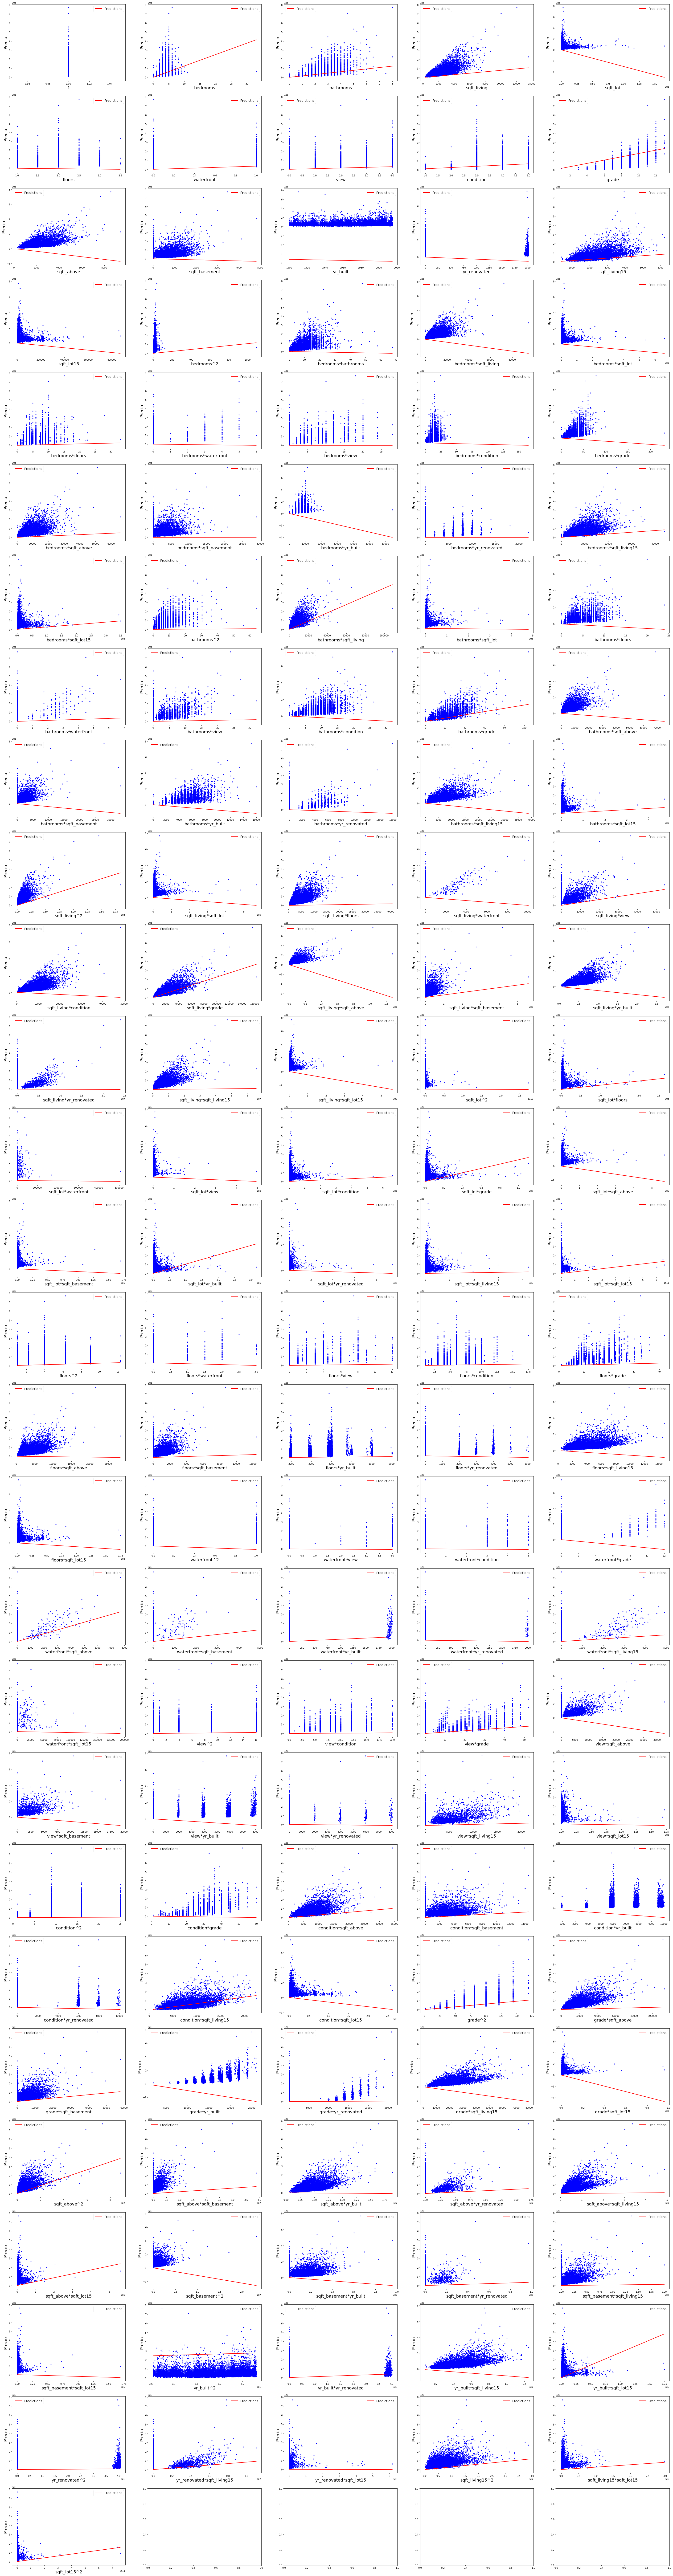

In [ ]:
fig, ax = plt.subplots(28,5, figsize = (50,200))

# Obtenemos ecuaciones parciales
for i, (coef, col) in enumerate(zip(lr_lasso.coef_,vars)):

  plt.subplot(28,5,i+1) 

  # Imprimimos los puntos originales
  plt.plot(features[col],y_train,'b.')

  X_base = np.linspace(features[col].min(),features[col].max(),100).reshape(100,1)
  y_pred_lr_lasso = coef*X_base + (lr_lasso.coef_[0])

  # Imprimimos la función resultante como una línea
  plt.plot(X_base, y_pred_lr_lasso, "r-", linewidth=2, label="Predictions")
  # Imprimimos etiqueta de eje x
  plt.xlabel("{}".format(col), fontsize=18)
  # Imprimimos etiqueta de eje y
  plt.ylabel("Precio", rotation=90, fontsize=18)
  # Agregamos leyenda de línea para identificarla con un nombre
  plt.legend(loc="best", fontsize=14)

plt.show()

### Errores y R^2

In [ ]:
# Llamamos librerías de métricas a utilizar
from sklearn import metrics
from sklearn.metrics import r2_score

# Creamos predicciones con valores de entrenamiento
y_pred_lasso_train = lr_lasso.predict(X_train_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datso predecidos y los valores objetivo del conjunto de prueba
lr_lasso_mae_train = metrics.mean_absolute_error(y_train, y_pred_lasso_train)
lr_lasso_rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lasso_train))
lr_lasso_r2_train = r2_score(y_train, y_pred_lasso_train)

print('Error en datos de entrenamiento:')
print('Error medio Absoluto (MAE):', lr_lasso_mae_train)
print('Error Cuadrático Medio (RMSE):', lr_lasso_rmse_train)
print('r2_score:', lr_lasso_r2_train)

print('\n---------------------------\n')
#########################################################################################

# Creamos predicciones con valores de prueba
y_pred_lasso_test = lr_lasso.predict(X_test_pr)

# Generamos métricas MAE, RMSE y R^2 a partir de los datso predecidos y los valores objetivo del conjunto de prueba
lr_lasso_mae_test = metrics.mean_absolute_error(y_test, y_pred_lasso_test)
lr_lasso_rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_test))
lr_lasso_r2_test = r2_score(y_test, y_pred_lasso_test)

print('Error en datos de prueba:')
print('Error medio Absoluto (MAE):', lr_lasso_mae_test)
print('Error Cuadrático Medio (RMSE):', lr_lasso_rmse_test)
print('r2_score:', lr_lasso_r2_test)

Error en datos de entrenamiento:
Error medio Absoluto (MAE): 124944.9142174212
Error Cuadrático Medio (RMSE): 185746.27589914142
r2_score: 0.7390905150209915

---------------------------

Error en datos de prueba:
Error medio Absoluto (MAE): 122442.45003921306
Error Cuadrático Medio (RMSE): 187920.6664756373
r2_score: 0.7758518296447035


## Gráfica de métricas

Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [ ]:
# Creamos DataFrame con las mpetricas
df_metrics = pd.DataFrame({'R. Lineal':[lr_mae_train,lr_r2_train,lr_mae_test,lr_r2_test],'R. Polinomial \n(Grado 2)':[pr_mae_train,pr_r2_train,pr_mae_test,pr_r2_test],'R. Ridge':[lr_ridge_mae_train,lr_ridge_r2_train, lr_ridge_mae_test,lr_ridge_r2_test],'R. Lasso':[lr_lasso_mae_train,lr_lasso_r2_train, lr_lasso_mae_test,lr_lasso_r2_test]},index=['MAE_train','R^2_train','MAE_test','R^2_test'])
df_metrics = df_metrics.transpose()
df_metrics

MAE_train  R^2_train       MAE_test  R^2_test
R. Lineal                  139269.329391   0.652920  137480.138827  0.657972
R. Polinomial \n(Grado 2)  123191.514477   0.746952  121313.440331  0.779788
R. Ridge                   123195.833800   0.746926  121284.738666  0.779764
R. Lasso                   124944.914217   0.739091  122442.450039  0.775852

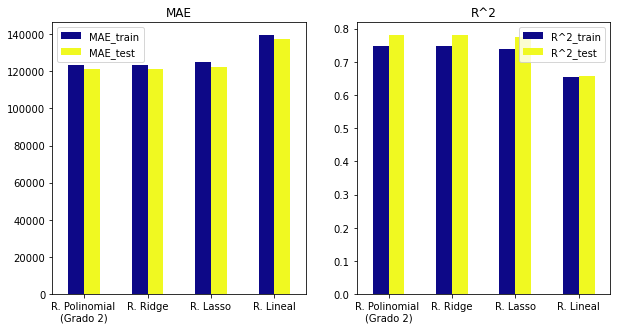

In [ ]:
# Creamos subplots
fig,ax = plt.subplots(1,2,figsize=(10,5))

# Establecemos tema
cmap = plt.get_cmap('plasma')

# Impresión de datos de MAE
df_metrics[['MAE_train','MAE_test']].sort_values(['MAE_train','MAE_test']).plot.bar(title = 'MAE', rot = 0, ax = ax[0], cmap = cmap)

# Impresión de datos de R^2
df_metrics[['R^2_train','R^2_test']].sort_values(['R^2_train','R^2_test'], ascending = False).plot.bar(title = 'R^2', rot = 0, ax = ax[1], cmap = cmap)
plt.show()

## Explicación de resultados

Con base en lo observado en los modelos multivariables (con varias variables independientes y una dependiente) se puede concluir lo sieguiente.

En primer lugar, se pudo notar una diferencia ustancial en el nivel de dificultad de los sistemas multivariable en comparación con los univariables al involucrar mayor cantidad de elementos que iterar tanto para la generación de modelos como la generación de visualizaciones y ecuaciones, hecho que no se presentó en el cálculo de los errores.

A diferencia del caso univariables del ejercicio 1 y debido a la eleveada cantidad de columnas de variables independientes, la función fit_transform sobre los datos generó un fallo para un grado 10 excediendo la capacidad de RAM permitida tanto en el entorno en línea como el local, con ello se pudo llegar a la conclusión de que uan muy elevada cantidad de columnas (del rango de las miles de columnas) puede evitar que se entrene un modelo.

Con respecto a al comparativa de desempeño, se puede observar que el mejor modelo fue la regresión plinomial grado 2 para ambas métricas utilizadas tanto para los datos de entrenamiento como de prueba

Acerca de la métrica de MAE, se observan valores muy elevados (del orden de las decenas de miles) lo cuall podría indicar un error elevado en nuestro modelo. 

cabe mencionar que para casos multivariable, la R^2 no es una métricsa adecuada ya que esta aumentará de manera inherente al número de columnas generadas, sin embargo, como medida comparativa es funcional.

# Concluciones